# Setup

In [1]:
import sys
sys.path.append('../../')

import CCfrag

# Creating queries for AlphaFold

In [2]:
INPUT_FASTA = 'EEA1.fasta'

In [10]:
for win_len, overlap in [[70, 35], [50,25], [30,15], [20,10]]:
	for nmer in [2]:
		divider = CCfrag.Divider(L=win_len, O=overlap, nmer=nmer, flank="RMKQLEDKVEELLSKNYHLENEVARLKKLVGER")
		divider.generate_queries(INPUT_FASTA, 'CCfrag_constructs_EEA1_with_GCN4', format='single_fasta')

>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2
>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2
>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2
>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2


In [11]:
!ls CCfrag_constructs_EEA1_with_GCN4/EEA1_HS/

2_20_10  2_30_15  2_50_25  2_70_35  source_EEA1_HS.fasta


In [12]:
!ls CCfrag_constructs_EEA1_with_GCN4/EEA1_HS/2_20_10/

constructs.csv	parameters.json  queries


In [13]:
!ls CCfrag_constructs_EEA1_with_GCN4/EEA1_HS/2_20_10/queries/

EEA1_HS_2_0-20.fasta	   EEA1_HS_2_140-160.fasta  EEA1_HS_2_570-590.fasta
EEA1_HS_2_1000-1020.fasta  EEA1_HS_2_150-170.fasta  EEA1_HS_2_580-600.fasta
EEA1_HS_2_100-120.fasta    EEA1_HS_2_160-180.fasta  EEA1_HS_2_590-610.fasta
EEA1_HS_2_1010-1030.fasta  EEA1_HS_2_170-190.fasta  EEA1_HS_2_600-620.fasta
EEA1_HS_2_1020-1040.fasta  EEA1_HS_2_180-200.fasta  EEA1_HS_2_60-80.fasta
EEA1_HS_2_1030-1050.fasta  EEA1_HS_2_190-210.fasta  EEA1_HS_2_610-630.fasta
EEA1_HS_2_10-30.fasta	   EEA1_HS_2_200-220.fasta  EEA1_HS_2_620-640.fasta
EEA1_HS_2_1040-1060.fasta  EEA1_HS_2_20-40.fasta    EEA1_HS_2_630-650.fasta
EEA1_HS_2_1050-1070.fasta  EEA1_HS_2_210-230.fasta  EEA1_HS_2_640-660.fasta
EEA1_HS_2_1060-1080.fasta  EEA1_HS_2_220-240.fasta  EEA1_HS_2_650-670.fasta
EEA1_HS_2_1070-1090.fasta  EEA1_HS_2_230-250.fasta  EEA1_HS_2_660-680.fasta
EEA1_HS_2_1080-1100.fasta  EEA1_HS_2_240-260.fasta  EEA1_HS_2_670-690.fasta
EEA1_HS_2_1090-1110.fasta  EEA1_HS_2_250-270.fasta  EEA1_HS_2_680-700.fasta
EEA1_HS_2_1100-1120

# Running AlphaFold

In [18]:
%%bash

cd DEIfold_constructs_EEA1_with_GCN4/EEA1_HS/
ROOT_FOLDER=$(pwd)

for i in $(ls -d */)
do
echo $i
cd $ROOT_FOLDER
cd $i

# this line will predict models for all the FASTA files inside the 'queries' folder,
# and output the resulting files to the 'predictions' folder
colabfold_batch queries predictions --num-recycle=5

done

2_20_10/
2_30_15/
2_50_25/
2_70_35/


In [3]:
!du -h -d 1 | grep CCfrag

1,1G	./CCfrag_constructs_EEA1_with_GCN4


# Creating the CCfrag assembly

In [4]:
import matplotlib.pyplot as plt

## ColabFold

In [5]:
integrator = CCfrag.Integrator(path_fragments='CCfrag_constructs_EEA1_with_GCN4/EEA1_HS',
                               list_features=['plddt', 'para', 'kih', 'pae'],
                               data_output='DATA_CCfrag.csv')

In [6]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of EEA1_HS ...
EEA1_HS read as a sequence of length 1411
Found 4 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/


In [7]:
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_20_10_pae,2_30_15_plddt,2_30_15_para,2_30_15_kih,2_30_15_pae,2_50_25_plddt,2_50_25_para,2_50_25_kih,2_50_25_pae,2_70_35_plddt,2_70_35_para,2_70_35_kih,2_70_35_pae
0,M,0,52.0300,1.0,0.0,13.069351,57.5150,1.0,0.0,15.698331,73.970,1.0,0.0,16.557289,48.300,1.0,0.0,18.865165
1,L,1,47.5800,1.0,0.0,13.069351,55.8300,1.0,0.0,15.698331,74.155,1.0,0.0,16.557289,46.125,1.0,0.0,18.865165
2,R,2,50.2950,1.0,0.0,13.069351,60.6550,1.0,0.0,15.698331,76.530,1.0,0.0,16.557289,46.500,1.0,0.0,18.865165
3,R,3,48.5950,1.0,0.0,13.069351,59.6900,1.0,0.0,15.698331,71.905,1.0,0.0,16.557289,45.110,1.0,0.0,18.865165
4,I,4,44.7950,1.0,0.0,13.069351,54.4350,1.0,0.0,15.698331,69.340,1.0,0.0,16.557289,40.685,1.0,0.0,18.865165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,N,1406,61.8425,1.0,0.0,13.667443,68.5300,1.0,0.0,13.232441,65.500,1.0,0.0,17.236868,89.625,0.0,0.0,11.735739
1407,D,1407,63.2950,1.0,0.0,13.667443,68.6075,1.0,0.0,13.232441,63.530,1.0,0.0,17.236868,87.810,0.0,0.0,11.735739
1408,L,1408,64.7425,1.0,0.0,13.667443,68.2500,1.0,0.0,13.232441,64.045,1.0,0.0,17.236868,84.375,0.0,0.0,11.735739
1409,Q,1409,66.8175,1.0,0.0,13.667443,70.8675,1.0,0.0,13.232441,63.470,1.0,0.0,17.236868,77.750,0.0,0.0,11.735739


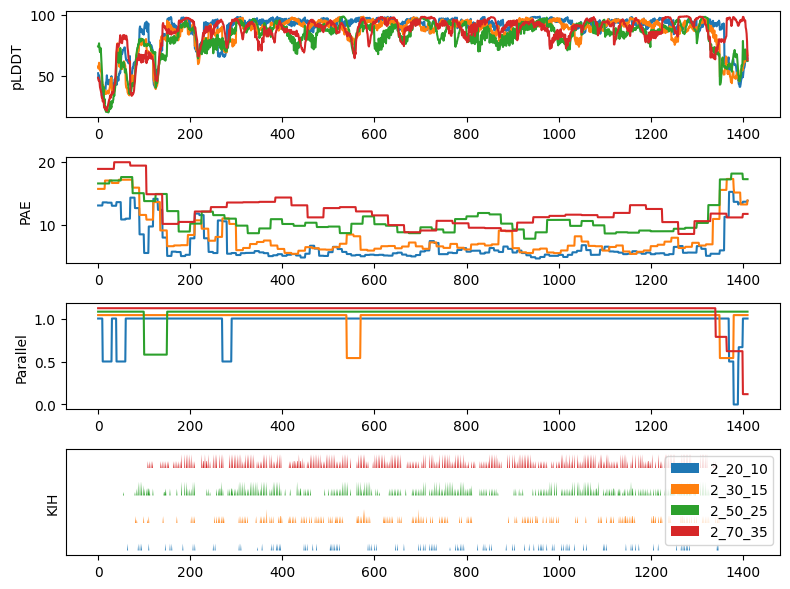

In [8]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), )

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend()
plt.tight_layout()
#plt.vlines(x=580, ymin=0,ymax=100)

In [9]:
integrator = CCfrag.Integrator(path_fragments='CCfrag_constructs_EEA1_with_GCN4/EEA1_HS',
                              list_features=['plddt', 'para', 'kih', 'pae'],
                              model_subfolder='predictions_esmfold',
                              prediction_format='esmfold',
                              data_output='DATA_CCfrag_ESMfold.csv')

WARNING PAE is not supported with ESMfold


In [10]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of EEA1_HS ...
EEA1_HS read as a sequence of length 1411
Found 4 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/


In [11]:
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_30_15_plddt,2_30_15_para,2_30_15_kih,2_50_25_plddt,2_50_25_para,2_50_25_kih,2_70_35_plddt,2_70_35_para,2_70_35_kih
0,M,0,41.228750,1.0,0.0,38.116875,1.0,0.0,52.249375,1.0,0.0,33.497500,1.0,0.0
1,L,1,37.526250,1.0,0.0,34.142500,1.0,0.0,49.685625,1.0,0.0,32.026250,1.0,0.0
2,R,2,39.294545,1.0,0.0,37.286364,1.0,0.0,47.597273,1.0,0.0,33.737273,1.0,0.0
3,R,3,40.177273,1.0,0.0,37.538182,1.0,0.0,48.594545,1.0,0.0,34.529545,1.0,0.0
4,I,4,36.343750,1.0,0.0,32.056875,1.0,0.0,45.018125,1.0,0.0,27.798125,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,N,1406,59.164062,1.0,0.0,70.916875,1.0,0.0,73.061250,0.0,0.0,82.133125,0.0,0.0
1407,D,1407,61.816563,1.0,0.0,73.503438,1.0,0.0,73.298750,0.0,0.0,76.353125,0.0,0.0
1408,L,1408,58.927500,1.0,0.0,70.515000,1.0,0.0,76.194375,0.0,0.0,78.114375,0.0,0.0
1409,Q,1409,60.364722,1.0,0.0,69.479444,1.0,0.0,71.024444,0.0,0.0,72.889444,0.0,0.0


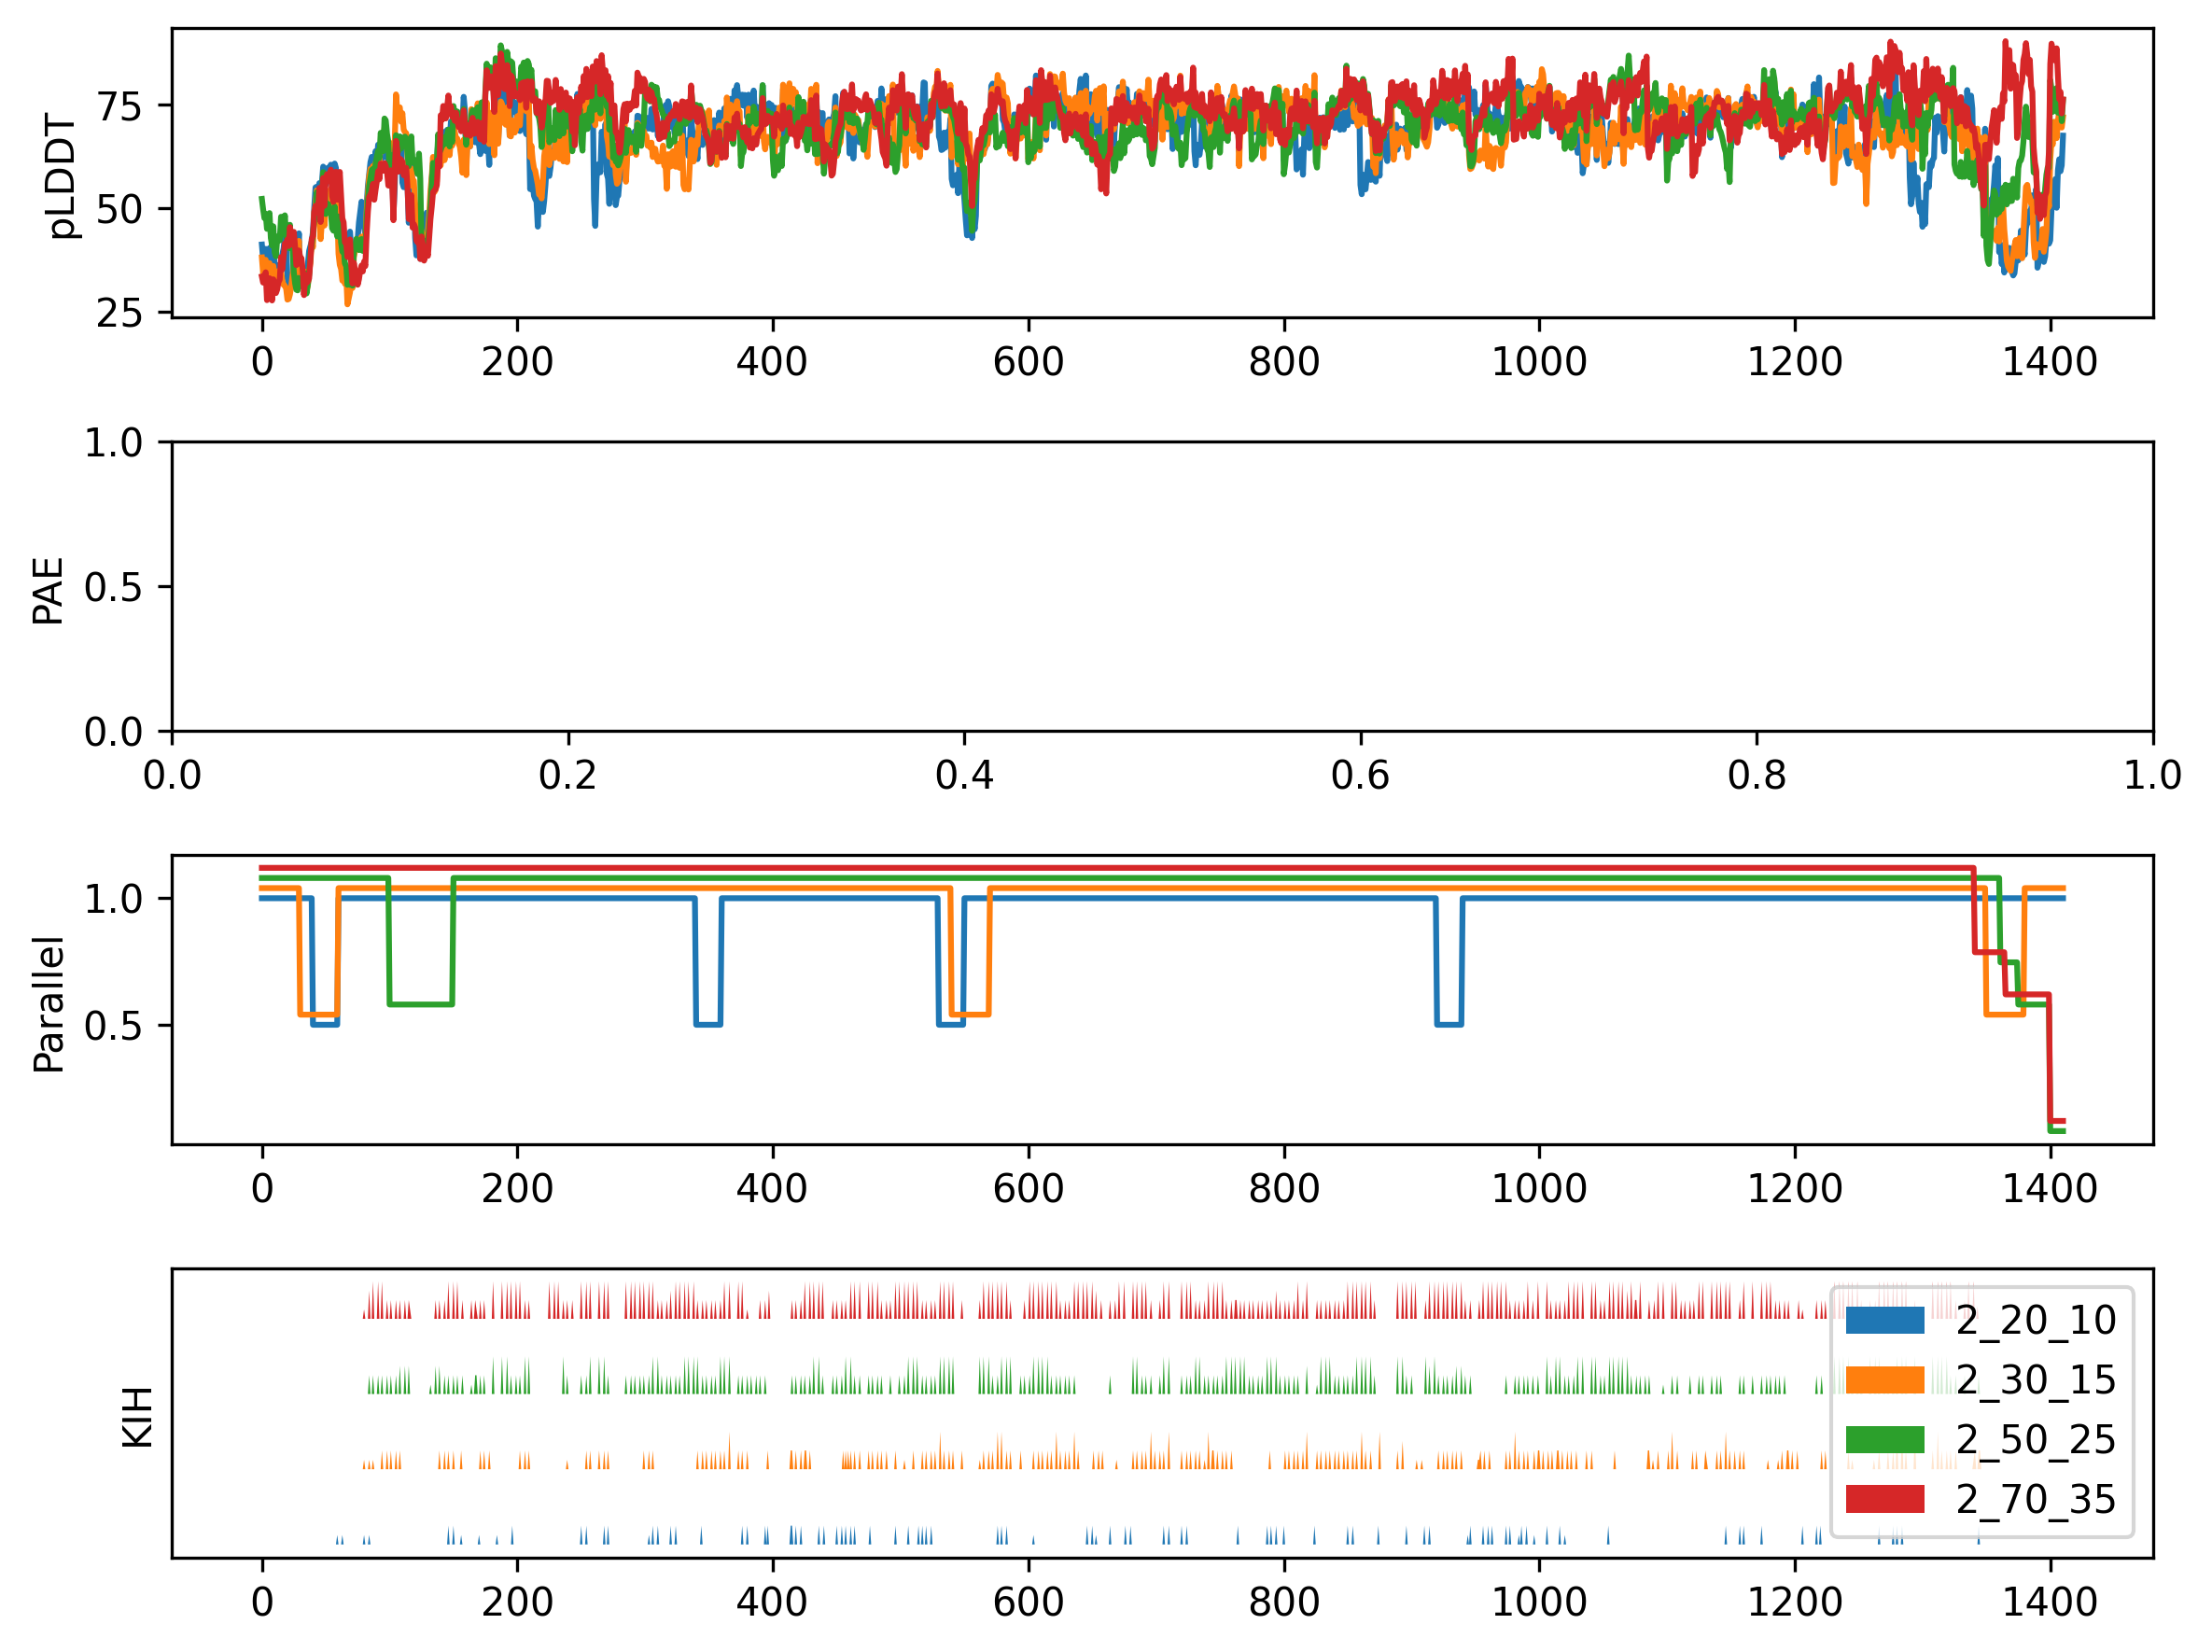

In [12]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), dpi=300)

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    #axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend()
plt.tight_layout()
#plt.vlines(x=580, ymin=0,ymax=100)